### Loading the dataset and observing

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# load the dataset
with open("INC_5000_Companies_2019.csv", "r") as file:
    df = pd.read_csv(file)


In [3]:
print("Number of rows:", len(df)) # print the number of rows
print("Number of columns:", len(df.columns)) # print the number of columns

df.head() # display the first 5 rows of the dataframe

Number of rows: 5012
Number of columns: 14


,ï»¿rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9 Million,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4 Million,21849.8925,Consumer Products & Services,57.0,2,2014,1,NaN,Albuquerque
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5 Million,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia


In [4]:
df.tail() # display the last 5 rows of the dataframe

,ï»¿rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
5007,4996,https://www.inc.com/profile/village-plumbing-air,Village Plumbing & Air,villageplumbing.com,TX,15.8 Million,52.2377,Consumer Products & Services,88.0,62,1946,3,Houston,Houston
5008,4997,https://www.inc.com/profile/real-restoration-g...,Real Restoration Group,realrestoration.com,IL,11.6 Million,52.2127,Construction,380.0,220,2011,1,Chicago,Chicago
5009,4998,https://www.inc.com/profile/naval-systems,Naval Systems,n-s-i.us,MD,29.7 Million,52.2037,Government Services,187.0,127,2004,1,NaN,LEXINGTON PARK
5010,4999,https://www.inc.com/profile/hnm-systems,HNM Systems,hnmsystems.com,CA,8.8 Million,52.1919,Telecommunications,132.0,47,2011,1,San Diego,Solana Beach
5011,5000,https://www.inc.com/profile/vivayic,Vivayic,vivayic.com,NE,4.5 Million,52.1691,Business Products & Services,27.0,22,2006,4,NaN,Lincoln


In [5]:
df.describe() # get summary statistics of the dataframe

,ï»¿rank,growth_%,workers,previous_workers,founded,yrs_on_list
count,5012.000000,5012.000000,5011.000000,5012.000000,5012.000000,5012.000000
mean,2499.628292,454.680059,242.783077,111.687151,2005.445531,2.813647
std,1443.232009,1284.288709,2800.165478,1073.878175,30.310632,2.265986
min,1.000000,52.169100,0.000000,1.000000,0.000000,1.000000
25%,1249.750000,90.562500,22.000000,8.000000,2003.000000,1.000000
50%,2497.500000,157.530650,48.000000,20.000000,2009.000000,2.000000
75%,3749.250000,330.427250,116.000000,50.000000,2012.000000,4.000000
max,5000.000000,36680.388200,155000.000000,53000.000000,2016.000000,14.000000


In [6]:
df.info() # get information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ï»¿rank           5012 non-null   int64  
 1   profile           5012 non-null   object 
 2   name              5012 non-null   object 
 3   url               5012 non-null   object 
 4   state             5012 non-null   object 
 5   revenue           5012 non-null   object 
 6   growth_%          5012 non-null   float64
 7   industry          5012 non-null   object 
 8   workers           5011 non-null   float64
 9   previous_workers  5012 non-null   int64  
 10  founded           5012 non-null   int64  
 11  yrs_on_list       5012 non-null   int64  
 12  metro             4199 non-null   object 
 13  city              5012 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 548.3+ KB


### Cleaing The Dataframe

In [7]:
# Change column names revenue to revenue_in_millions so we can make it float later
# Rename ï»¿rank to rank so we can access it easily
df_cleaned = df.rename(columns={"revenue": "revenue_in_millions", "ï»¿rank": "rank"})

In [8]:
# Checking the number of rows with revenue in Billion
billion_count = df_cleaned["revenue_in_millions"].astype(str).str.contains("Billion").sum()

print("Number of rows with revenue in Billion:", billion_count)


Number of rows with revenue in Billion: 23


In [9]:
# Remove rows with revenue in Billion
df_cleaned = df_cleaned[~df_cleaned["revenue_in_millions"].astype(str).str.contains("Billion")]


In [10]:
 # Checking the number of rows with revenue in Billion again
billion_count = df_cleaned["revenue_in_millions"].astype(str).str.contains("Billion").sum()

print("Number of rows with revenue in Billion:", billion_count)


Number of rows with revenue in Billion: 0


In [11]:
# Convert revenue_in_millions to float
df_cleaned["revenue_in_millions"] = (
    df_cleaned["revenue_in_millions"]
    .astype(str)                       # force to string
    .str.replace(" Million", "", regex=False)
    .astype(float)
)


In [12]:
# Display the cleaned revenue_in_millions column and its data type
df_cleaned.dtypes["revenue_in_millions"]


dtype('float64')

In [13]:
# check for missing values in each column
missung_values = df_cleaned.isnull().sum()
print("Missing values in each column:\n", missung_values)

Missing values in each column:
 rank                     0
profile                  0
name                     0
url                      0
state                    0
revenue_in_millions      0
growth_%                 0
industry                 0
workers                  1
previous_workers         0
founded                  0
yrs_on_list              0
metro                  810
city                     0
dtype: int64


In [14]:
# drop metro column since it has many missing values
drop_columns = ["metro"]
df_dropped = df_cleaned.drop(columns=drop_columns)
print("Columns after dropping unnecessary ones:", df_dropped.columns)

Columns after dropping unnecessary ones: Index(['rank', 'profile', 'name', 'url', 'state', 'revenue_in_millions',
       'growth_%', 'industry', 'workers', 'previous_workers', 'founded',
       'yrs_on_list', 'city'],
      dtype='object')


In [15]:
# drop rows with missing values in founded and workers columns
df_dropped = df_dropped[
    (df_dropped["founded"] != 0) & (df_dropped["workers"] != 0)
]

In [16]:
# drop rows with missing values
filtered_df = df_dropped.dropna()
print("Number of rows after dropping missing values:", len(filtered_df))    

Number of rows after dropping missing values: 4983


In [17]:
# check for missing values again
missing_values = filtered_df.isnull().sum()
print("Missing values in each column after cleaning:\n", missing_values)


Missing values in each column after cleaning:
 rank                   0
profile                0
name                   0
url                    0
state                  0
revenue_in_millions    0
growth_%               0
industry               0
workers                0
previous_workers       0
founded                0
yrs_on_list            0
city                   0
dtype: int64


In [18]:
# check for duplicated rows
dubplicated_rows = filtered_df.duplicated().sum()
print("Number of duplicated rows:", dubplicated_rows)

Number of duplicated rows: 0


In [19]:
# display summary statistics of the cleaned dataframe
filtered_df.describe()

,rank,revenue_in_millions,growth_%,workers,previous_workers,founded,yrs_on_list
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000
mean,2494.311258,31.233474,456.173394,192.716436,88.597632,2005.905679,2.794301
std,1441.726552,71.526140,1287.633084,1696.734395,855.369543,10.676041,2.228162
min,1.000000,2.000000,52.169100,1.000000,1.000000,1869.000000,1.000000
25%,1246.500000,4.700000,91.005650,22.000000,8.000000,2003.000000,1.000000
50%,2489.000000,10.300000,158.345700,48.000000,19.000000,2009.000000,2.000000
75%,3740.500000,26.600000,331.249350,114.000000,50.000000,2012.000000,4.000000
max,5000.000000,990.600000,36680.388200,96000.000000,53000.000000,2016.000000,14.000000


### Analysis and Answering Questions Requirements

In [20]:
# Calculate average growth percentage
average_growth = filtered_df["growth_%"].mean()
print("Average growth percentage:", average_growth)


Average growth percentage: 456.17339412000797


In [21]:
# Get top 5 companies with highest growth percentage
top_5_growth = filtered_df.sort_values(
    by="growth_%",
    ascending=False
).head(5)

top_5_growth[["name", "growth_%"]]


,name,growth_%
0,Freestar,36680.3882
1,FreightWise,30547.9317
2,Cece's Veggie Co.,23880.4852
3,LadyBoss,21849.8925
4,Perpay,18166.4070


In [22]:
# Get industry distribution
industry_distribution = filtered_df["industry"].value_counts()

industry_distribution


industry
Advertising & Marketing         489
Business Products & Services    489
Software                        461
Health                          354
Construction                    346
Consumer Products & Services    311
IT Management                   275
Financial Services              239
Government Services             234
Real Estate                     198
Logistics & Transportation      181
Manufacturing                   181
Retail                          161
Human Resources                 155
Food & Beverage                 127
IT System Development           120
Engineering                      81
Telecommunications               78
Energy                           76
Insurance                        70
Education                        70
Security                         66
Travel & Hospitality             57
Media                            46
Environmental Services           43
IT Services                      43
Computer Hardware                32
Name: count, dtype:

In [23]:
# Compare average growth percentage by industry
industry_growth_comparison = (
    filtered_df
    .groupby("industry")["growth_%"].mean()
    .sort_values(ascending=False)
)

industry_growth_comparison


industry
Logistics & Transportation      735.233507
Consumer Products & Services    692.214278
Food & Beverage                 668.225534
Computer Hardware               651.975244
Energy                          605.174050
Retail                          586.832463
Health                          548.749022
Software                        524.673761
Telecommunications              521.135262
Security                        493.754250
Government Services             488.812871
Advertising & Marketing         486.685136
Environmental Services          458.554665
Financial Services              423.942329
Real Estate                     417.554633
Media                           413.729200
IT System Development           385.909106
Education                       384.560157
Construction                    361.076187
Travel & Hospitality            346.417214
Manufacturing                   333.701503
Business Products & Services    311.427862
Insurance                       306.150356
Hu

## Extracting Insights

### Insight 1: Industry growth differences
The analysis shows that average growth varies across industries. Some industries grow faster than others, which indicates that industry type plays an important role in company performance.

### Insight 2: Growth is concentrated among few companies
The top-performing companies have much higher growth compared to the rest of the dataset. This suggests that exceptional growth is achieved by a small number of firms.

### Insight 3: Certain industries dominate the Inc 5000 list
Some industries appear more frequently in the dataset, indicating higher representation and possibly better conditions for scaling.


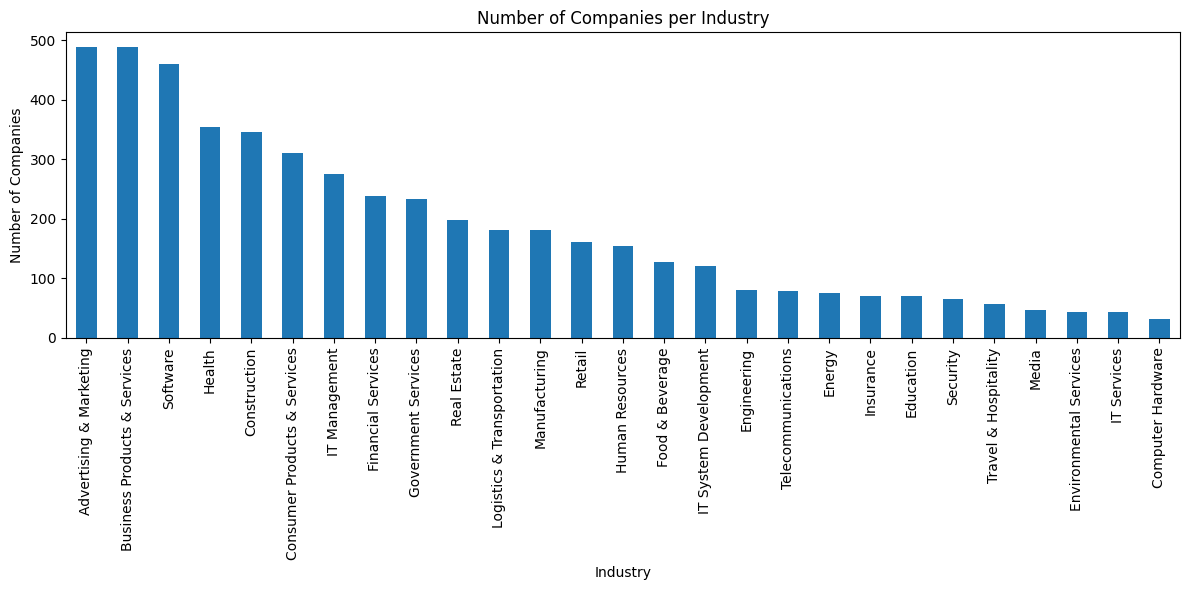

In [24]:
# Count companies per industry
industry_counts = filtered_df["industry"].value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6)) 
industry_counts.plot(kind="bar") # plot bar chart

plt.title("Number of Companies per Industry")
plt.xlabel("Industry")
plt.ylabel("Number of Companies")

plt.tight_layout() # adjust layout
plt.show()

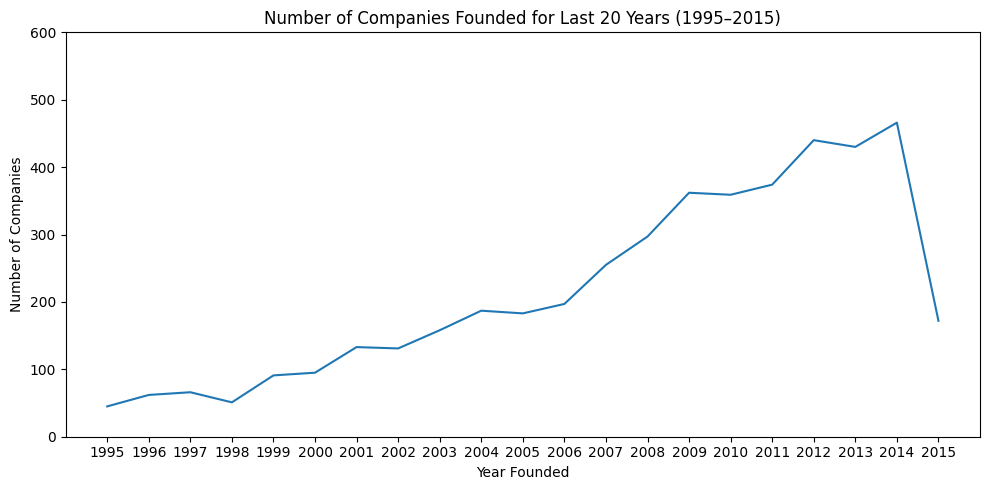

In [25]:
# Count number of companies founded per year
companies_per_year = filtered_df["founded"].value_counts().sort_index()

# Filter last 20 years (from 1996)
companies_per_year_20 = companies_per_year[ (companies_per_year.index >= 1995) & (companies_per_year.index <= 2015) ]

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(companies_per_year_20.index, companies_per_year_20.values)

plt.title("Number of Companies Founded for Last 20 Years (1995–2015)")
plt.xlabel("Year Founded")
plt.ylabel("Number of Companies")

plt.xticks(companies_per_year_20.index)

# HARD y-axis limit
plt.ylim(0, 600)

# Remove extra padding
plt.margins(y=0)

plt.tight_layout()
plt.show()



In [26]:
# Keep ORIGINAL dataframe
filtered_df_original = filtered_df

# Create a TRUE COPY
filtered_df_company_size = filtered_df.copy()


In [27]:
# Calculate statistics on the COPY
median_workers = filtered_df_company_size["workers"].median()
q1 = filtered_df_company_size["workers"].quantile(0.25)
q3 = filtered_df_company_size["workers"].quantile(0.75)

print("Median workers:", median_workers)
print("Q1 (25%):", q1)
print("Q3 (75%):", q3)

Median workers: 48.0
Q1 (25%): 22.0
Q3 (75%): 114.0


In [28]:
# Create company size categories (ONLY on the COPY)
filtered_df_company_size.loc[:, "company_size"] = pd.cut(
    filtered_df_company_size["workers"],
    bins=[-np.inf, q1, q3, np.inf],
    labels=["Small-sized", "Mid-sized", "Big-sized"],
    include_lowest=True
)

In [29]:
# Show distribution (COPY only)
print("\nCompanies per size category (COPY):")
print(filtered_df_company_size["company_size"].value_counts())


Companies per size category (COPY):
company_size
Mid-sized      2476
Small-sized    1263
Big-sized      1244
Name: count, dtype: int64


In [30]:
# Prove difference between ORIGINAL and COPY
print("\nColumns in ORIGINAL dataframe:")
print(filtered_df_original.columns)

print("\nColumns in COPY dataframe:")
print(filtered_df_company_size.columns)

print("\nAre ORIGINAL and COPY the same object?")
print(id(filtered_df_original) == id(filtered_df_company_size))


Columns in ORIGINAL dataframe:
Index(['rank', 'profile', 'name', 'url', 'state', 'revenue_in_millions',
       'growth_%', 'industry', 'workers', 'previous_workers', 'founded',
       'yrs_on_list', 'city'],
      dtype='object')

Columns in COPY dataframe:
Index(['rank', 'profile', 'name', 'url', 'state', 'revenue_in_millions',
       'growth_%', 'industry', 'workers', 'previous_workers', 'founded',
       'yrs_on_list', 'city', 'company_size'],
      dtype='object')

Are ORIGINAL and COPY the same object?
False


In [31]:
# Preview both dataframes
print("\n--- ORIGINAL preview ---")
print(filtered_df_original[["name", "workers"]].head(5))

print("\n--- COPY preview (with company_size) ---")
print(filtered_df_company_size[["name", "workers", "company_size"]].head(5))



--- ORIGINAL preview ---
                name  workers
0           Freestar     40.0
1        FreightWise     39.0
2  Cece's Veggie Co.    190.0
3           LadyBoss     57.0
4             Perpay     25.0

--- COPY preview (with company_size) ---
                name  workers company_size
0           Freestar     40.0    Mid-sized
1        FreightWise     39.0    Mid-sized
2  Cece's Veggie Co.    190.0    Big-sized
3           LadyBoss     57.0    Mid-sized
4             Perpay     25.0    Mid-sized


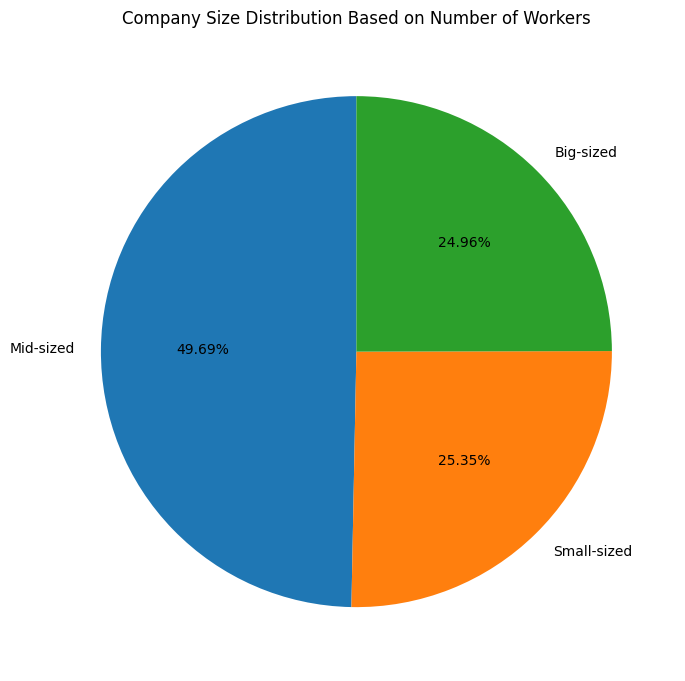

In [32]:
# Count companies per size category
size_counts = filtered_df_company_size["company_size"].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    size_counts.values,
    labels=size_counts.index,
    autopct="%1.2f%%",
    startangle=90
)

plt.title("Company Size Distribution Based on Number of Workers")
plt.tight_layout()
plt.show()

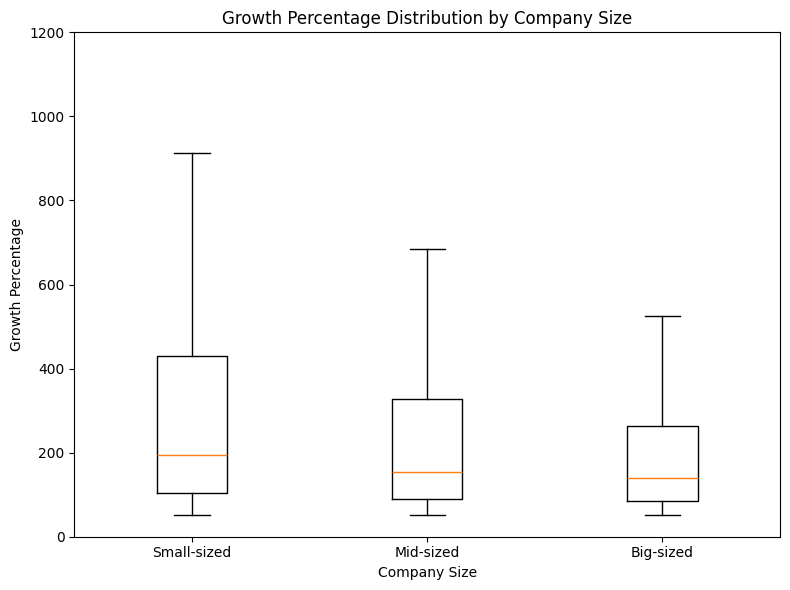

In [33]:
# Prepare data for box plot
small = filtered_df_company_size[
    filtered_df_company_size["company_size"] == "Small-sized"
]["growth_%"]

mid = filtered_df_company_size[
    filtered_df_company_size["company_size"] == "Mid-sized"
]["growth_%"]

big = filtered_df_company_size[
    filtered_df_company_size["company_size"] == "Big-sized"
]["growth_%"]

# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(
    [small, mid, big],
    tick_labels=["Small-sized", "Mid-sized", "Big-sized"],
    showfliers=False
)

plt.title("Growth Percentage Distribution by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Growth Percentage")
plt.ylim(0, 1200)

plt.tight_layout()
plt.show()